### Name : Anupam Tudu
### Roll : 2001313010
### QID : 20030011
### Btech(Hons) CSE-AIML 3rd Year

# Loading the CIFAR 10 Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('./train.csv') # importing training dataset of CIFAR 10
df_test = pd.read_csv('./test.csv') # importing testing dataset of CIFAR 10

In [2]:
df_train.shape

(50000, 3073)

In [3]:
df_test.shape

(10000, 3072)

In [4]:
df_train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [5]:
lb = df_train['label']

In [6]:
df = df_train.drop('label', axis=1)

In [7]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,59,43,50,68,98,119,139,145,149,149,...,59,58,65,59,46,57,104,140,84,72
1,154,126,105,102,125,155,172,180,142,111,...,22,42,67,101,122,133,136,139,142,144
2,255,253,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,28,37,38,42,44,40,40,24,32,43,...,53,39,59,42,44,48,38,28,37,46
4,170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,72,68,64,61,63,59,57,56,53,54
49996,255,254,255,254,254,254,254,253,254,254,...,57,61,64,68,64,76,82,79,81,76
49997,35,40,42,39,43,45,48,51,53,56,...,91,94,104,103,96,93,87,77,66,50
49998,189,186,185,184,182,181,180,180,181,180,...,160,166,171,171,172,169,165,169,171,171


In [8]:
lb.shape

(50000,)

In [9]:
df.shape

(50000, 3072)

In [10]:
grid_data = df.values.reshape(len(df), 3, 32, 32)

In [11]:
grid_data.shape

(50000, 3, 32, 32)

In [12]:
grid_data = grid_data.transpose(0,2,3,1)

In [13]:
grid_data.shape

(50000, 32, 32, 3)

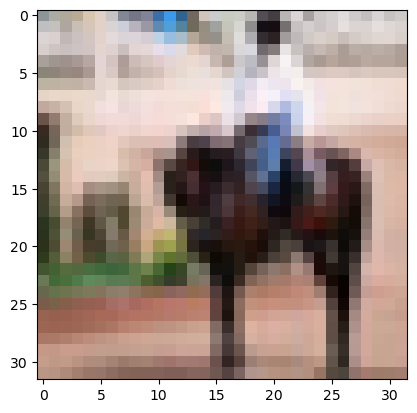

In [14]:
plt.imshow(grid_data[11])
plt.show()

# 2D Visualization using PCA

In [15]:
labels = lb.head(20000)
data = df.head(20000)

data.shape

(20000, 3072)

In [16]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
standardized_data.shape

(20000, 3072)

### Finding Covariance Matrix

In [17]:
sample_data = standardized_data

covar_matrix = np.matmul(sample_data.T, sample_data)
print("The shape of covariance matrix: ", covar_matrix.shape)

The shape of covariance matrix:  (3072, 3072)


### For Projecting onto 2D Space

In [18]:
from scipy.linalg import eigh

values, vectors = eigh(covar_matrix, eigvals=(3070, 3071))

print("The shape of eigen vectors :", vectors.shape)

The shape of eigen vectors : (3072, 2)


In [19]:
vectors = vectors.T
print("Updated shape of eigen vectoes: ", vectors.shape)

Updated shape of eigen vectoes:  (2, 3072)


In [20]:
new_coordinates = np.matmul(vectors, sample_data.T)
print("Resultant new data points shape", 
      vectors.shape, 'x', sample_data.T.shape, '=', 
      new_coordinates.shape)

Resultant new data points shape (2, 3072) x (3072, 20000) = (2, 20000)


In [21]:
new_coordinates = np.vstack((new_coordinates, labels)).T
dataf = pd.DataFrame(data=new_coordinates, columns=("1st_principal", 
                                                    "2nd_principal", 
                                                    "label"))
dataf.head()

,1st_principal,2nd_principal,label
0,-12.211197,22.281412,6.0
1,4.953871,-3.718199,9.0
2,47.751809,-21.060135,9.0
3,-2.223358,39.365715,4.0
4,16.532093,15.656836,1.0


In [22]:
dataf.shape

(20000, 3)

### Plotting the 2D datapoints

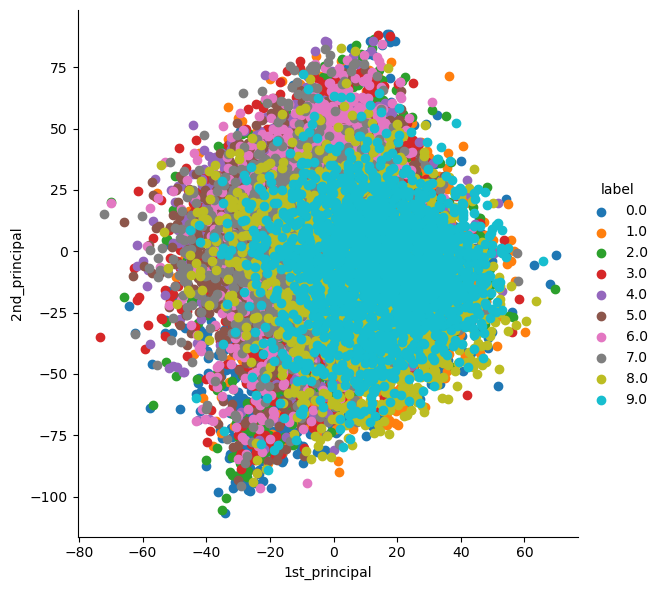

In [23]:
import seaborn as sns
sns.FacetGrid(dataf, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [24]:
from sklearn import decomposition
pca = decomposition.PCA()

In [25]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("The shape of 'pca_reduced.shape': ", pca_data.shape)

The shape of 'pca_reduced.shape':  (20000, 2)


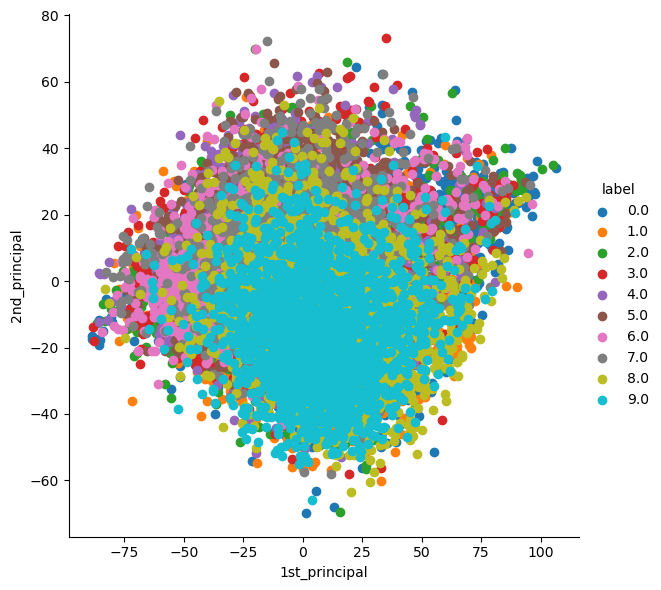

In [26]:
pca_data = np.vstack((pca_data.T, labels)).T

pca_df = pd.DataFrame(data=pca_data, columns=('1st_principal', '2nd_principal', 'label'))
sns.FacetGrid(pca_df, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for Dimensionality Reduction

In [27]:
pca.n_components = 3072
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

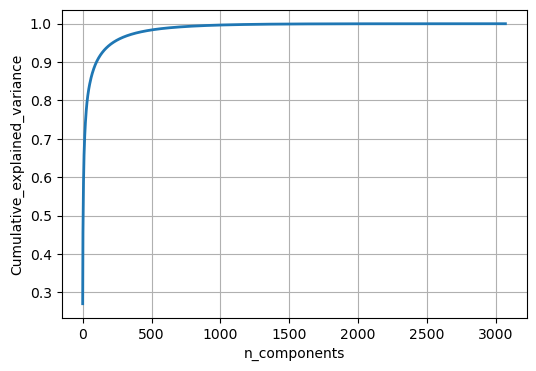

In [28]:
plt.figure(1, figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### Thank You